In [41]:
import numpy as np
import scipy as sc
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from collections import OrderedDict
from fractions import Fraction

%matplotlib inline
mpl.rcParams['figure.figsize'] = (10.0, 5)

In [42]:
# nice to have
def plot_matrix(matrix):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix, interpolation='nearest')
    fig.colorbar(cax)

In [106]:
transaction_df = pd.DataFrame({'Mozzarella' : [1,0,1,0,1,0,0,1],
                               'Balsamico' : [0,1,1,0,1,0,0,1],
                               'Pepsi' : [1,0,0,1,0,0,1,0],
                               'Pasta' : [0,1,0,1,1,1,0,1],
                               'Wine' : [0,0,1,0,0,1,1,1]})
transaction_df

,Balsamico,Mozzarella,Pasta,Pepsi,Wine
0,0,1,0,1,0
1,1,0,1,0,0
2,1,1,0,0,1
3,0,0,1,1,0
4,1,1,1,0,0
5,0,0,1,0,1
6,0,0,0,1,1
7,1,1,1,0,1


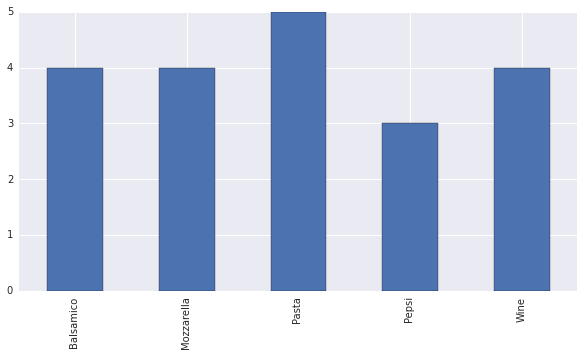

In [107]:
# calculate support for every product in all transactions
product_support_dict = {}
for column in transaction_df.columns:
    product_support_dict[column] = sum(transaction_df[column]>0)
    
# visualise support
pd.Series(product_support_dict).plot(kind="bar")

In [108]:
transaction_matrix = transaction_df.as_matrix()
transaction_matrix

array([[0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1]])

In [109]:
bool_index = (transaction_matrix>0)
bool_index

array([[False,  True, False,  True, False],
       [ True, False,  True, False, False],
       [ True,  True, False, False,  True],
       [False, False,  True,  True, False],
       [ True,  True,  True, False, False],
       [False, False,  True, False,  True],
       [False, False, False,  True,  True],
       [ True,  True,  True, False,  True]], dtype=bool)

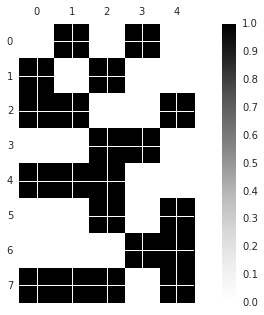

In [110]:
plot_matrix(transaction_matrix)

In [111]:
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((5,5))
# compare every product with every other
for this_column in range(0, columns-1):
    print "this:", this_column,":",transaction_df.columns[this_column]
    for next_column in range(this_column + 1, columns):
        print "\tnext:", next_column,":",transaction_df.columns[next_column]
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        print "\t", count_matches
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches


this: 0 : Balsamico
	next: 1 : Mozzarella
	3
	next: 2 : Pasta
	3
	next: 3 : Pepsi
	0
	next: 4 : Wine
	2
this: 1 : Mozzarella
	next: 2 : Pasta
	2
	next: 3 : Pepsi
	1
	next: 4 : Wine
	2
this: 2 : Pasta
	next: 3 : Pepsi
	1
	next: 4 : Wine
	2
this: 3 : Pepsi
	next: 4 : Wine
	1


In [112]:
print frequent_items_matrix 

[[ 0.  3.  3.  0.  2.]
 [ 0.  0.  2.  1.  2.]
 [ 0.  0.  0.  1.  2.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]]


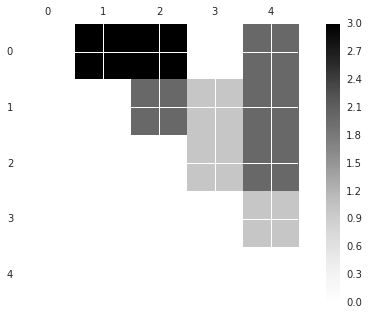

In [113]:
plot_matrix(frequent_items_matrix)

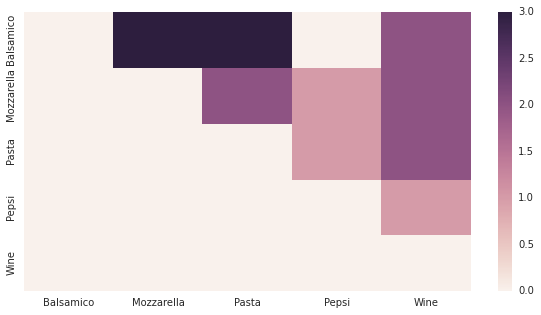

In [114]:
# combine matrix with names
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = transaction_df.columns.values, index = transaction_df.columns.values)
sns.heatmap(frequent_items_df)

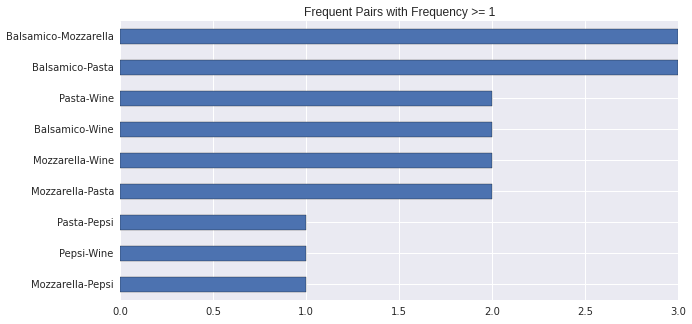

In [115]:
product_names = transaction_df.columns.values

# extract product pairs with minimum frequency(treshold) basket occurrences
def extract_pairs(treshold):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
    
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
    
# plot pairs with minimum frequency of 2 basket matches
min_frequency = 1
ax = pd.Series(extract_pairs(min_frequency)).plot(kind="barh", title="Frequent Pairs with Frequency >= " + str(min_frequency))